In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

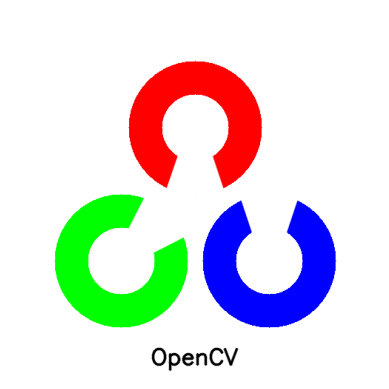

In [ ]:
width, height = 500, 500
image = np.ones((height, width, 3), dtype=np.uint8) * 255

radius = 90
center = (width // 2, height // 2)
offset_x = 100
offset_y = 90

positions = {
    "red":    (center[0], center[1] - offset_y),
    "green":   (center[0] - offset_x, center[1] + offset_y),
    "blue":  (center[0] + offset_x, center[1] + offset_y),
}

# Draw the circles
cv2.circle(image, positions["red"], radius, (0, 0, 255), -1)
cv2.circle(image, positions["blue"], radius, (255, 0, 0), -1)
cv2.circle(image, positions["green"], radius, (0, 255, 0), -1)

cv2.circle(image, positions["red"], radius//2, (255, 255, 255), -1)
cv2.circle(image, positions["blue"], radius//2, (255, 255, 255), -1)
cv2.circle(image, positions["green"], radius//2, (255, 255, 255), -1)

def draw_trapezium(image, center, direction, bottom_base=80, top_base=20, height=90, color=(255, 255, 255), thickness=-1):
    cx, cy = center
    angle_rad = math.radians(direction)

    dx = math.cos(angle_rad)
    dy = -math.sin(angle_rad)


    px = -dy
    py = dx

    p1 = (cx - px * top_base / 2, cy - py * top_base / 2)
    p2 = (cx + px * top_base / 2, cy + py * top_base / 2)

    far_x = cx + dx * height
    far_y = cy + dy * height
    p3 = (far_x + px * bottom_base / 2, far_y + py * bottom_base / 2)
    p4 = (far_x - px * bottom_base / 2, far_y - py * bottom_base / 2)

    pts = np.array([p1, p2, p3, p4], dtype=np.int32).reshape((-1, 1, 2))

    cv2.fillPoly(image, [pts], color, lineType=cv2.LINE_AA)

draw_trapezium(image, positions["red"], direction=270)
draw_trapezium(image, positions["blue"], direction=90)
draw_trapezium(image, positions["green"], direction=45)

font = cv2.FONT_HERSHEY_SIMPLEX
text = "OpenCV"
font_scale = 1
thickness = 2
text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
text_x = (width - text_size[0]) // 2
text_y = height - 20
cv2.putText(image, text, (text_x, text_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

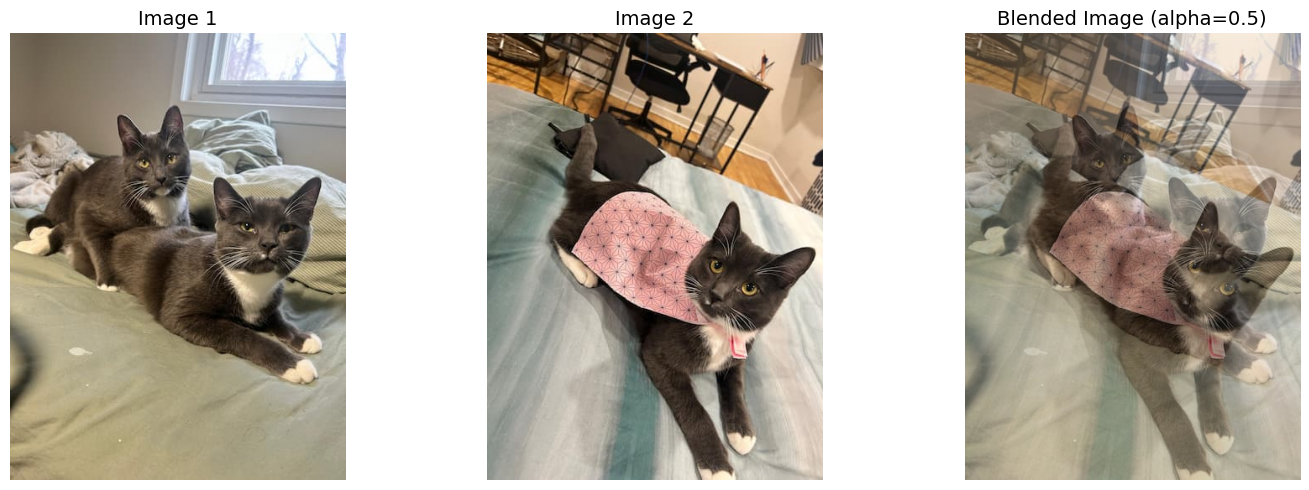

In [ ]:
def manual_blend(img1, img2, alpha):
    if not (0 <= alpha <= 1):
        raise ValueError("Alpha must be between 0 and 1")

    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    img1_f = img1.astype(np.float32)
    img2_f = img2.astype(np.float32)

    blended = (1 - alpha) * img1_f + alpha * img2_f

    blended = np.clip(blended, 0, 255).astype(np.uint8)

    return blended

img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

if img1 is None or img2 is None:
    print("Error: Could not load one or both images.")
    exit()

alpha = 0.5

blended_img = manual_blend(img1, img2, alpha)
cv2.imwrite("manual_blend.jpg", blended_img)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
blended_rgb = cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [img1_rgb, img2_rgb, blended_rgb]
titles = ['Image 1', 'Image 2', f'Blended Image (alpha={alpha})']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit


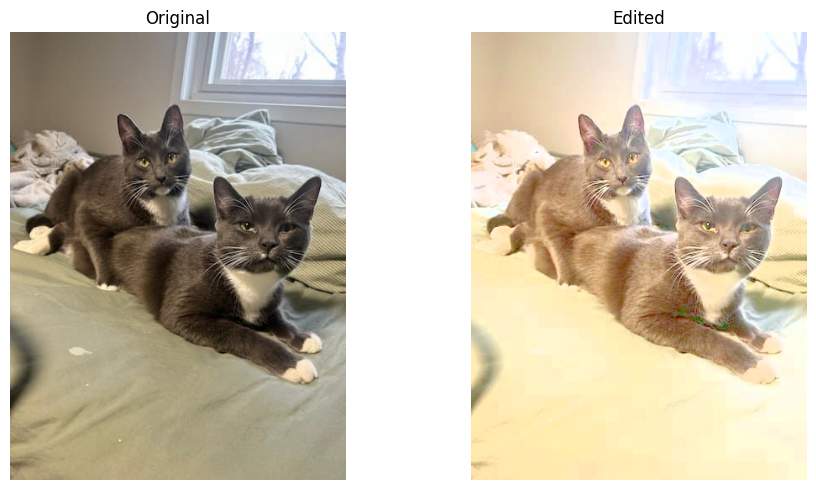


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit


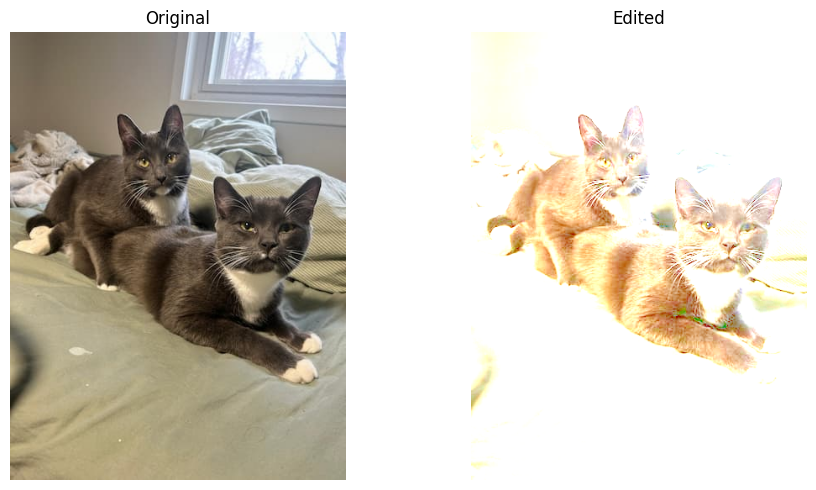


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit


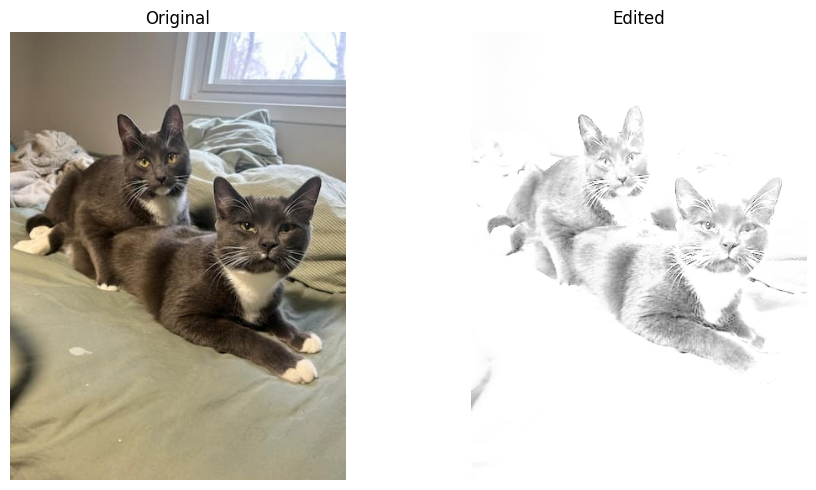


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
Choose border type:
 0: Constant
 1: Replicate
 2: Reflect
 3: Wrap
Choose padding proportion:
 1: Square
 2: Rectangle (4:3)
 3: Custom Ratio


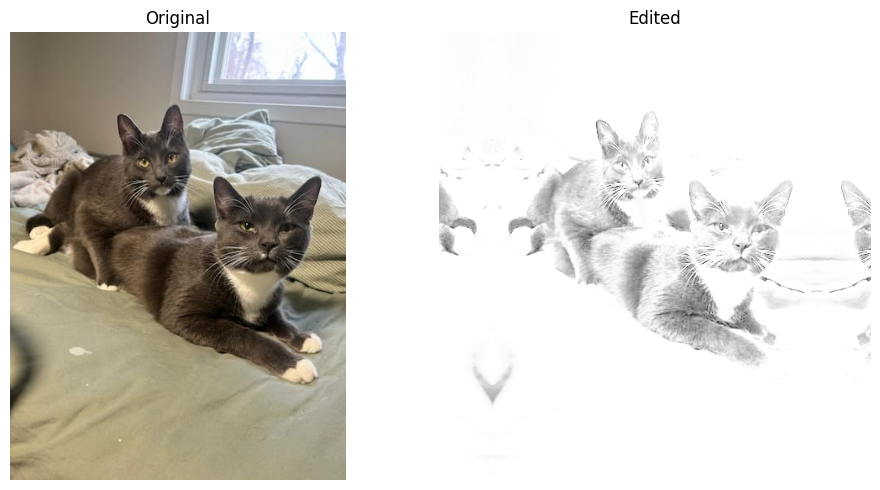


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
Choose thresholding type:
 1: Binary
 2: Binary Inverse


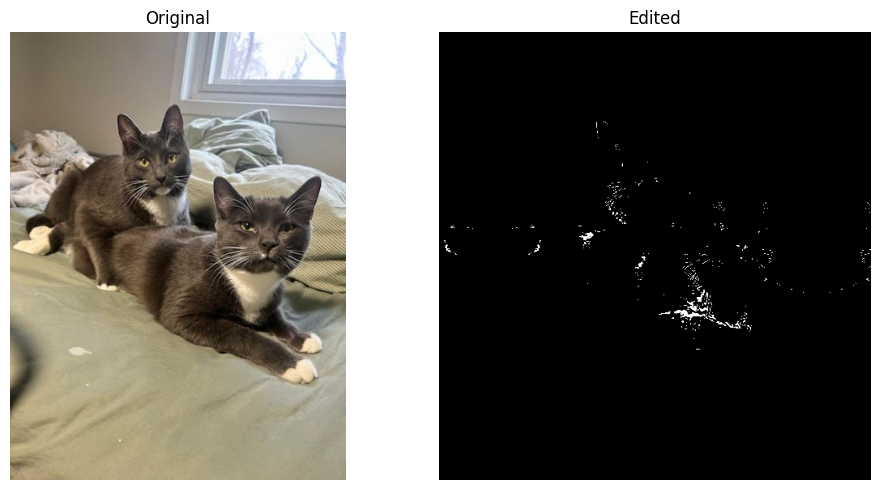


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit


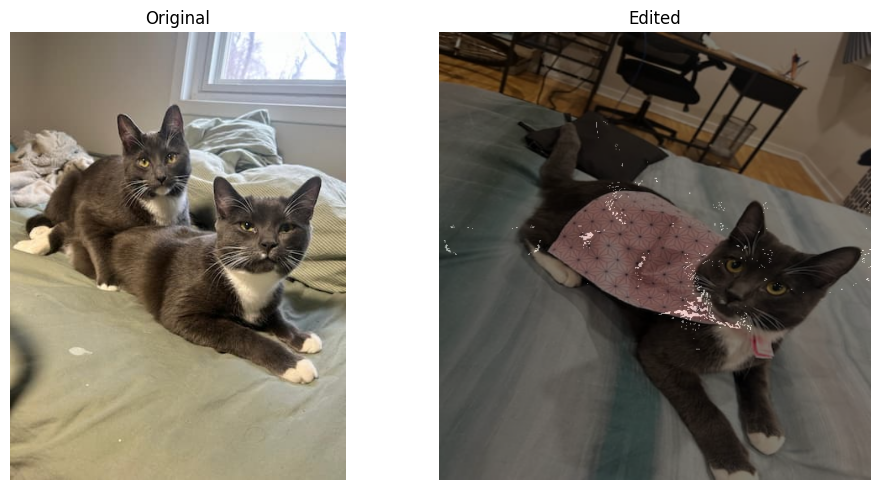


==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit

--- History of Operations ---
1. Loaded image
2. Brightness 100
3. Contrast x1.5
4. Converted to grayscale
5. Padded 20px with square ratio, border type 2
6. Thresholding (binary_inv)
7. Blended with image2.jpg at alpha=0.5

==== Mini Photo Editor ====
1. Adjust Brightness
2. Adjust Contrast
3. Convert to Grayscale
4. Add Padding (choose border type)
5. Apply Thresholding (binary or inverse)
6. Blend with Another Image (manual alpha)
7. Undo Last Operation
8. View History of Operations
9. Save and Exit
Image saved as Edited.jpg
Exiting.


In [14]:
def show_side_by_side(original, edited, title_original='Original', title_edited='Edited'):

    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    edited_rgb = cv2.cvtColor(edited, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(original_rgb)
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(edited_rgb)
    plt.title(title_edited)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def clamp(value, min_value, max_value):
    return max(min_value, min(value, max_value))

def adjust_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255).astype(np.uint8)
    final_hsv = cv2.merge((h, s, v))
    bright_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return bright_img

def adjust_contrast(img, alpha):
    img_float = img.astype(np.float32)
    img_contrast = cv2.convertScaleAbs(img_float * alpha)
    return img_contrast

def convert_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

def add_padding(img, pad_size, border_type, ratio_type='square', custom_ratio=None):
    h, w = img.shape[:2]

    if ratio_type == 'square':
        target_ratio = 1.0
    elif ratio_type == 'rectangle':
        target_ratio = 4/3
    elif ratio_type == 'custom':
        if custom_ratio is None:
            raise ValueError("custom_ratio must be provided for 'custom' ratio_type")
        target_ratio = custom_ratio[0] / custom_ratio[1]
    else:
        raise ValueError("Invalid ratio_type")

    current_ratio = w / h

    pad_left = pad_right = pad_top = pad_bottom = 0

    if abs(current_ratio - target_ratio) < 1e-3:
        pad_left = pad_right = pad_top = pad_bottom = pad_size // 4
    elif current_ratio < target_ratio:
        new_w = int(target_ratio * h)
        total_pad_w = new_w - w
        pad_left = total_pad_w // 2
        pad_right = total_pad_w - pad_left
        pad_top = pad_bottom = pad_size // 2
    else:
        new_h = int(w / target_ratio)
        total_pad_h = new_h - h
        pad_top = total_pad_h // 2
        pad_bottom = total_pad_h - pad_top
        pad_left = pad_right = pad_size // 2

    padded_img = cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right, border_type)

    return padded_img, (pad_top, pad_bottom, pad_left, pad_right)

def apply_threshold(img, thresh_type, thresh_value=127):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if thresh_type == 'binary':
        _, threshed = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'binary_inv':
        _, threshed = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY_INV)
    else:
        raise ValueError("Invalid threshold type")

    return cv2.cvtColor(threshed, cv2.COLOR_GRAY2BGR)

def manual_blend(img1, img2, alpha):
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    img1_f = img1.astype(np.float32)
    img2_f = img2.astype(np.float32)

    blended = (1 - alpha) * img1_f + alpha * img2_f
    blended = np.clip(blended, 0, 255).astype(np.uint8)

    return blended


def main():
    history = []
    history_log = []

    image_path = input("Enter image file path to load: ")
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image.")
        return

    original_img = img.copy()
    history.append(img.copy())
    history_log.append("Loaded image")

    while True:
        print("\n==== Mini Photo Editor ====")
        print("1. Adjust Brightness")
        print("2. Adjust Contrast")
        print("3. Convert to Grayscale")
        print("4. Add Padding (choose border type)")
        print("5. Apply Thresholding (binary or inverse)")
        print("6. Blend with Another Image (manual alpha)")
        print("7. Undo Last Operation")
        print("8. View History of Operations")
        print("9. Save and Exit")
        choice = input("Select an option (1-9): ")

        if choice == '1':
            try:
                val = int(input("Enter brightness adjustment value (-255 to 255): "))
                val = clamp(val, -255, 255)
                img = adjust_brightness(img, val)
                history.append(img.copy())
                history_log.append(f"Brightness {val}")
                show_side_by_side(original_img, img)
            except Exception as e:
                print("Error:", e)

        elif choice == '2':
            try:
                val = float(input("Enter contrast alpha (>0, e.g. 1.2): "))
                if val <= 0:
                    print("Contrast alpha must be > 0")
                    continue
                img = adjust_contrast(img, val)
                history.append(img.copy())
                history_log.append(f"Contrast x{val}")
                show_side_by_side(original_img, img)
            except Exception as e:
                print("Error:", e)

        elif choice == '3':
            img = convert_grayscale(img)
            history.append(img.copy())
            history_log.append("Converted to grayscale")
            show_side_by_side(original_img, img)

        elif choice == '4':
            try:
                pad_size = int(input("Enter total padding size (pixels): "))
                print("Choose border type:\n 0: Constant\n 1: Replicate\n 2: Reflect\n 3: Wrap")
                btype_in = int(input("Enter border type number: "))
                border_types = {
                    0: cv2.BORDER_CONSTANT,
                    1: cv2.BORDER_REPLICATE,
                    2: cv2.BORDER_REFLECT,
                    3: cv2.BORDER_WRAP
                }
                if btype_in not in border_types:
                    print("Invalid border type")
                    continue
                border_type = border_types[btype_in]

                print("Choose padding proportion:\n 1: Square\n 2: Rectangle (4:3)\n 3: Custom Ratio")
                ratio_choice = input("Enter option number: ")
                if ratio_choice == '1':
                    ratio_type = 'square'
                    custom_ratio = None
                elif ratio_choice == '2':
                    ratio_type = 'rectangle'
                    custom_ratio = None
                elif ratio_choice == '3':
                    ratio_type = 'custom'
                    raw_ratio = input("Enter custom ratio (width:height), e.g. 4:5: ")
                    try:
                        w_ratio, h_ratio = map(float, raw_ratio.split(':'))
                        custom_ratio = (w_ratio, h_ratio)
                    except:
                        print("Invalid ratio input")
                        continue
                else:
                    print("Invalid option")
                    continue

                img, pads = add_padding(img, pad_size, border_type, ratio_type, custom_ratio)
                history.append(img.copy())
                history_log.append(f"Padded {pad_size}px with {ratio_type} ratio, border type {btype_in}")
                show_side_by_side(original_img, img)

            except Exception as e:
                print("Error:", e)

        elif choice == '5':
            try:
                print("Choose thresholding type:\n 1: Binary\n 2: Binary Inverse")
                thresh_choice = input("Enter option number: ")
                if thresh_choice == '1':
                    thresh_type = 'binary'
                elif thresh_choice == '2':
                    thresh_type = 'binary_inv'
                else:
                    print("Invalid option")
                    continue
                img = apply_threshold(img, thresh_type)
                history.append(img.copy())
                history_log.append(f"Thresholding ({thresh_type})")
                show_side_by_side(original_img, img)
            except Exception as e:
                print("Error:", e)

        elif choice == '6':
            try:
                blend_path = input("Enter second image path to blend with: ")
                img2 = cv2.imread(blend_path)
                if img2 is None:
                    print("Could not load second image")
                    continue
                alpha = float(input("Enter alpha value (0 to 1): "))
                if not (0 <= alpha <= 1):
                    print("Alpha must be between 0 and 1")
                    continue
                img = manual_blend(img, img2, alpha)
                history.append(img.copy())
                history_log.append(f"Blended with {blend_path} at alpha={alpha}")
                show_side_by_side(original_img, img)
            except Exception as e:
                print("Error:", e)

        elif choice == '7':
            if len(history) > 1:
                history.pop()
                img = history[-1].copy()
                history_log.append("Undo last operation")
                print("Undo done.")
                show_side_by_side(original_img, img)
            else:
                print("No more undo steps available.")

        elif choice == '8':
            print("\n--- History of Operations ---")
            for i, log in enumerate(history_log, 1):
                print(f"{i}. {log}")

        elif choice == '9':
            save_choice = input("Save image before exit? (y/n): ").lower()
            if save_choice == 'y':
                filename = input("Enter filename to save (e.g., output.jpg): ")
                cv2.imwrite(filename, img)
                print(f"Image saved as {filename}")
            print("Exiting.")
            break

        else:
            print("Invalid choice, please enter a number from 1 to 9.")


main();